In [9]:
from pyspark.sql.functions import col, trim
from textblob import TextBlob
import matplotlib.pyplot as plt

# Load and clean the data
df = spark.read.option("header", "false").csv("/tmp/reddit_trump_output_csv")
clean_df = df.filter(trim(col("_c0")) != "comment").filter(trim(col("_c0")) != "")
clean_df = clean_df.select(trim(col("_c0")).alias("comment"))

pandas_df = clean_df.toPandas()

print(pandas_df)



                                               comment
0    >\tMy wife is Asian. She herself has voiced he...
1    I think you’re failing to consider that we’ve ...
2    Sorry, but you don't know that.   Every presid...
3    I don't think it still comparable to Russia. W...
4    Except, this is all sensationalized bullshit. ...
..                                                 ...
105                      “Trump Says”, Kept scrolling…
106                   Well that’s Trump ruled out then
107                       He’s a Trump supporter, too.
108                         Who hired the dude, Trump?
109                                  3:1 trump voter. 

[110 rows x 1 columns]


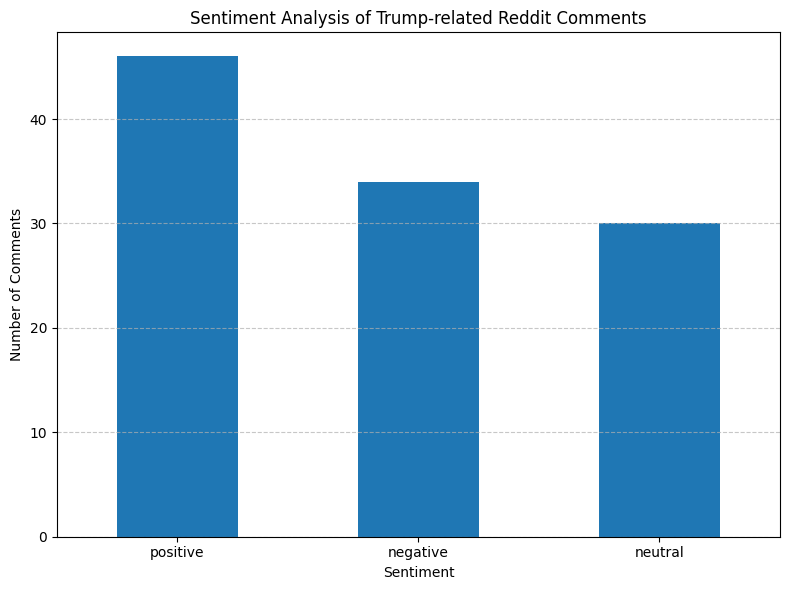

In [10]:
# Sentiment analysis
def get_sentiment(text):
    polarity = TextBlob(text).sentiment.polarity
    if polarity > 0:
        return "positive"
    elif polarity < 0:
        return "negative"
    else:
        return "neutral"

pandas_df['sentiment'] = pandas_df['comment'].apply(get_sentiment)

# Plot a bar chart 
sentiment_counts = pandas_df['sentiment'].value_counts()

plt.figure(figsize=(8, 6))
sentiment_counts.plot(kind='bar')
plt.title("Sentiment Analysis of Trump-related Reddit Comments")
plt.xlabel("Sentiment")
plt.ylabel("Number of Comments")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
